In [99]:
import pandas as pd, numpy as np

df = pd.read_csv("../data/csv/clean_V2.csv")

In [100]:
pd.set_option("display.max_columns", None)
df.sample(5)

,Price,Title,Number of USB 3.0 Ports,Brand,Series,Processor Brand,Item model number,Memory Technology,Hard Disk Description,Graphics Chipset Brand,DisplaySizeInches,HorizontalPixels,VerticalPixels,WeightKg,Refurbished,base_color,RAM_in_GB,Graphics_Coprocessor_Brand,OS_Name,MANU_Name,Graphics Storage (GB),Laptop_Type,ProcessorManufacturer,ProcessorSpeedGHz
5520,1516.4640,(Refurbished) HP ZBook Firefly 12th Gen Intel ...,0,HP,HP ZBook Firefly 16 inch G9 Mobile Workstation PC,Intel,HP ZBook Firefly 16 inch G9-cr,ddr5,SSD,Intel,40.6,1920.0,1200.0,1.800000,1,Silver,16.0,Intel,Windows,hp,16,Netbook,Intel I5,4.4
265,992.7864,Lenovo Ideapad 1 Laptop for Businese & Student...,0,Lenovo,Ideapad,AMD,82R4,other,SSD,AMD,15.6,1920.0,1080.0,1.596644,0,other,40.0,AMD,Windows,lenovo,1,Laptop,AMD RYZEN 7,1.8
3698,705.3120,ASUS Vivobook Go 14 Ryzen 7 Octa Ryzen 5 7520U...,0,ASUS,Vivobook Go 14,Other,ASUS Vivobook,other,SSD,AMD,14.0,1920.0,1080.0,2.340000,0,Silver,16.0,Intel,Windows,Other,16,Laptop,AMD RYZEN 5,5.0
7262,359.0000,"Lenovo IdeaPad Miix 520 Tablet 12.2"" FHD (1920...",1,Lenovo,Lenovo IdeaPad Miix 520,Intel,Lenovo IdeaPad,other,SSD,Intel,12.2,1920.0,1080.0,1.700000,1,other,16.0,Intel,Windows,lenovo,2,Laptop,Intel I7,3.0
6847,359.0000,"Lenovo ThinkPad X1 Carbon 14"" Full HD Laptop (...",0,Lenovo,ThinkPad X1 Carbon 6th Gen 20KH002WUS Ultrabook,Intel,ThinkPad X1 Carbon 6th Gen,other,SSD,Intel,14.0,1920.0,1080.0,1.360000,1,Black,4.0,Intel,Windows,lenovo,6,Laptop,Other,1.7


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       8025 non-null   float64
 1   Title                       8025 non-null   object 
 2   Number of USB 3.0 Ports     8025 non-null   int64  
 3   Brand                       8025 non-null   object 
 4   Series                      8025 non-null   object 
 5   Processor Brand             8025 non-null   object 
 6   Item model number           8025 non-null   object 
 7   Memory Technology           8025 non-null   object 
 8   Hard Disk Description       8025 non-null   object 
 9   Graphics Chipset Brand      8025 non-null   object 
 10  DisplaySizeInches           8025 non-null   float64
 11  HorizontalPixels            8025 non-null   float64
 12  VerticalPixels              8025 non-null   float64
 13  WeightKg                    8025 

In [102]:
df.drop(columns=["Number of USB 3.0 Ports", "Series", "Item model number", "Graphics Chipset Brand", "MANU_Name"], inplace=True)

Let's round the Price Values to be in Integers by rounding the values.

In [103]:
df['Price'] = df['Price'].round().astype(int)

In [104]:
df['RAM_in_GB'] = df['RAM_in_GB'].astype(int)

In [105]:
numeric_columns = df.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

(correlation_matrix)

,Price,DisplaySizeInches,HorizontalPixels,VerticalPixels,WeightKg,Refurbished,RAM_in_GB,Graphics Storage (GB),ProcessorSpeedGHz
Price,1.000000,0.193712,0.434750,0.355124,0.067253,-0.307461,0.081442,-0.011345,0.245062
DisplaySizeInches,0.193712,1.000000,0.094927,0.044229,0.007973,-0.178353,0.096739,0.003484,0.267284
HorizontalPixels,0.434750,0.094927,1.000000,0.785561,0.022546,-0.142768,0.045233,-0.069749,0.142456
VerticalPixels,0.355124,0.044229,0.785561,1.000000,0.020635,-0.030481,0.066526,-0.079954,0.098455
WeightKg,0.067253,0.007973,0.022546,0.020635,1.000000,0.091231,0.015284,0.012082,0.007368
Refurbished,-0.307461,-0.178353,-0.142768,-0.030481,0.091231,1.000000,-0.054379,-0.026253,-0.260694
RAM_in_GB,0.081442,0.096739,0.045233,0.066526,0.015284,-0.054379,1.000000,0.025012,0.069991
Graphics Storage (GB),-0.011345,0.003484,-0.069749,-0.079954,0.012082,-0.026253,0.025012,1.000000,-0.009394
ProcessorSpeedGHz,0.245062,0.267284,0.142456,0.098455,0.007368,-0.260694,0.069991,-0.009394,1.000000


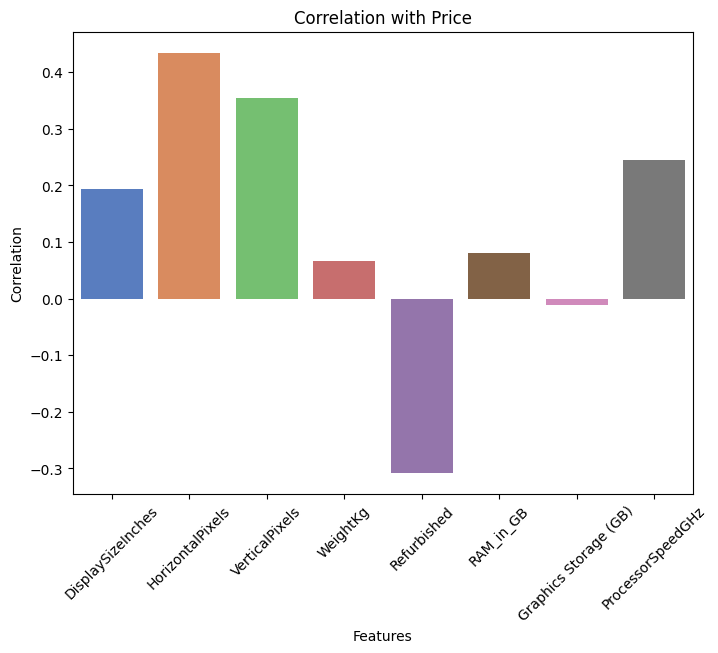

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['number']).drop(columns=['Price'])

# Calculate correlation of numeric columns with respect to 'Price' column
correlation_with_price = numeric_columns.corrwith(df['Price'])

# Plot the correlation values
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values, palette="muted")
plt.title('Correlation with Price')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_30446/834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

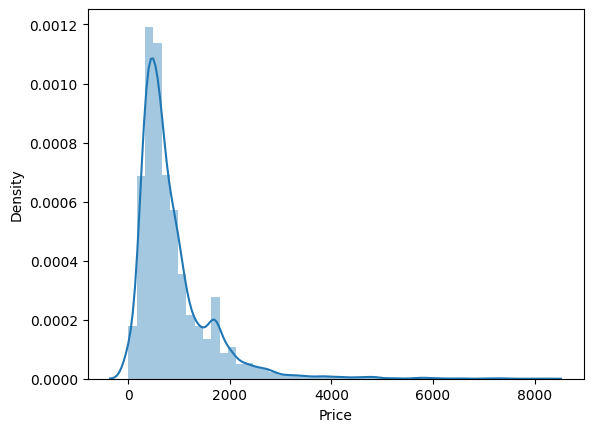

In [107]:
sns.distplot(df['Price'])

In [108]:
df["Brand"] = df["Brand"].str.capitalize()
values = df['Brand'].value_counts()

filtered_brands = values[values > 100].index
filtered_df = df[df['Brand'].isin(filtered_brands)]


<Axes: xlabel='Brand'>

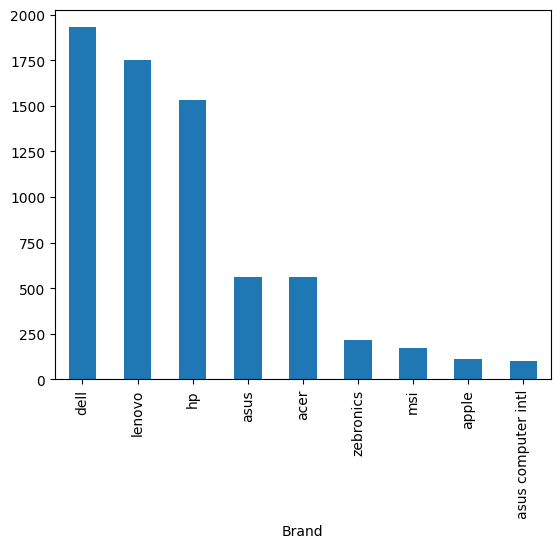

In [109]:
values = df['Brand'].value_counts()

filtered_values = values[values > 100]

filtered_values.plot(kind='bar')


In [110]:
df['Brand'] = df['Brand'].replace(['asus computer intl'], ['asus'] )

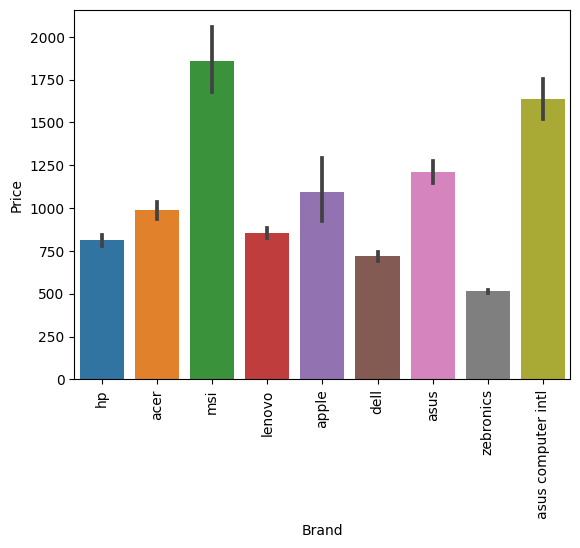

In [111]:
sns.barplot(x=filtered_df["Brand"],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Laptop_Type'>

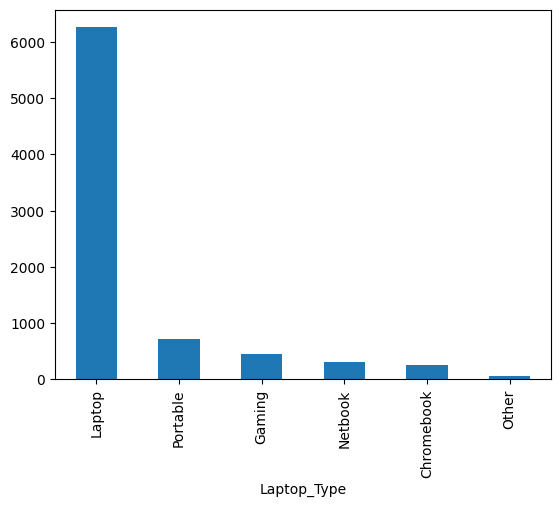

In [112]:
df['Laptop_Type'].value_counts().plot(kind='bar')

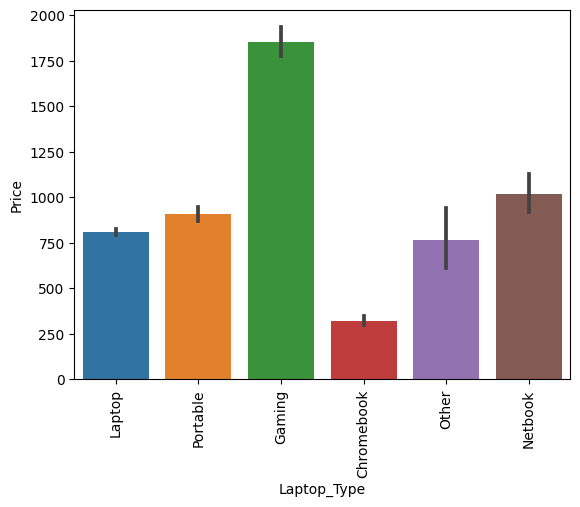

In [113]:
sns.barplot(x=df['Laptop_Type'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

/tmp/ipykernel_30446/2099600608.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DisplaySizeInches'])


<Axes: xlabel='DisplaySizeInches', ylabel='Density'>

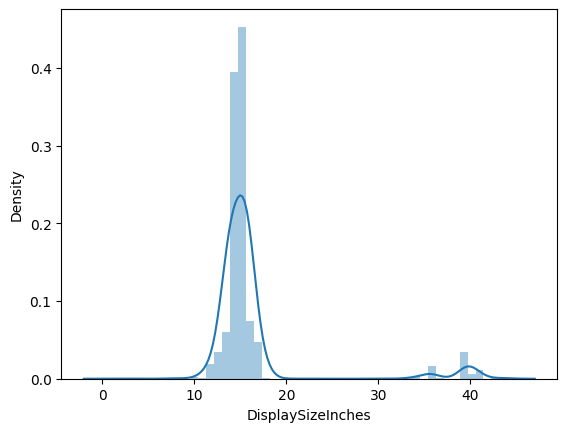

In [114]:
sns.distplot(df['DisplaySizeInches'])

<Axes: xlabel='DisplaySizeInches', ylabel='Price'>

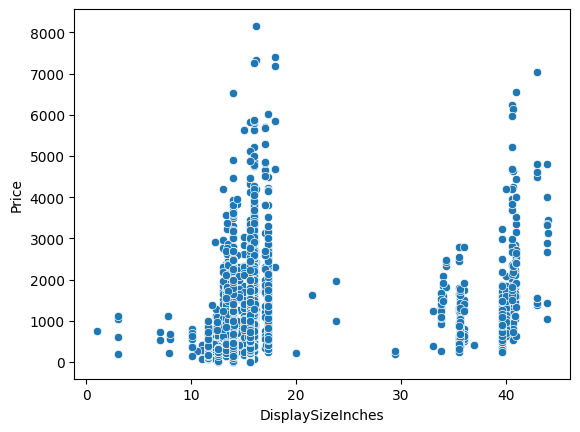

In [115]:
sns.scatterplot(x=df["DisplaySizeInches"],y=df['Price'])

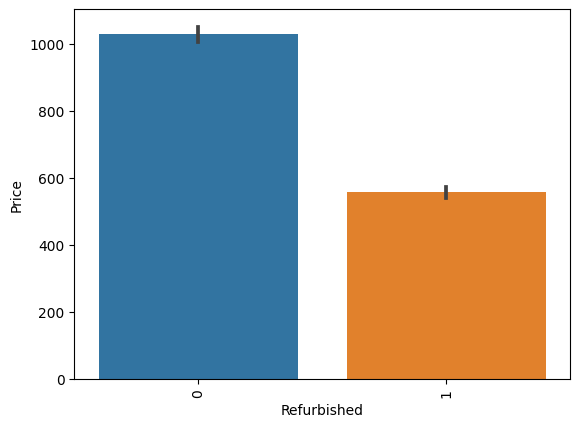

In [116]:
sns.barplot(x=df['Refurbished'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

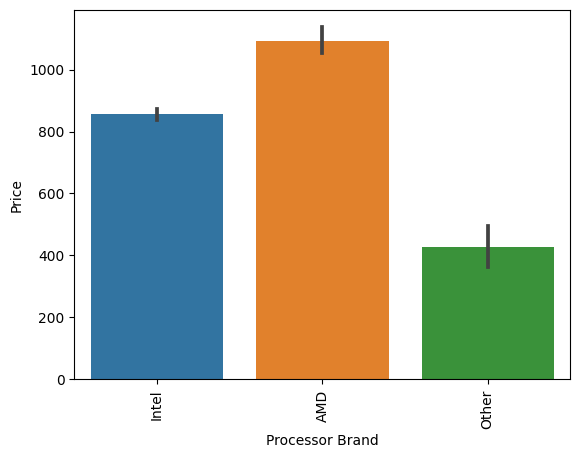

In [117]:
sns.barplot(x=df['Processor Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [118]:
# columns = ["Refurbished", "Processor Brand", "Laptop_Type", "Memory", "Graphics Chipset Brand", "Graphics_Coprocessor_Brand", "OS_Name", "MANU_Name"]

# fig, axes = plt.subplots(4, 2, figsize=(20, 6))

# for i, column in enumerate(columns):
#     print(column)
#     sns.barplot(x=df[column], y=df['Price'], ax=axes[i])
#     axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
#     axes[i].set_title(f'{column} vs Price')


# plt.tight_layout()
# plt.show()

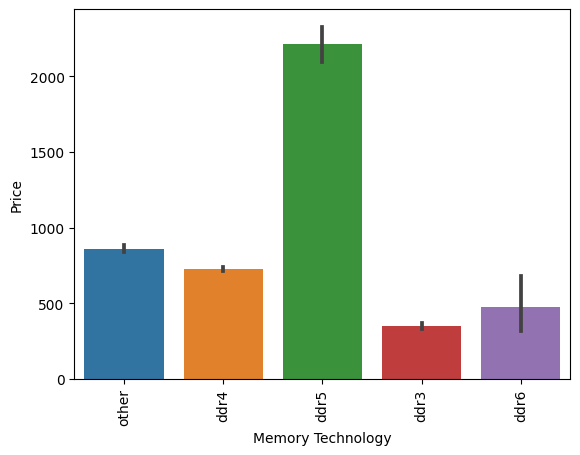

In [119]:
sns.barplot(x=df['Memory Technology'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [120]:
# df['Graphics Chipset Brand'] = df['Graphics Chipset Brand'].str.lower()

In [121]:
# df['Graphics Chipset Brand'].value_counts()

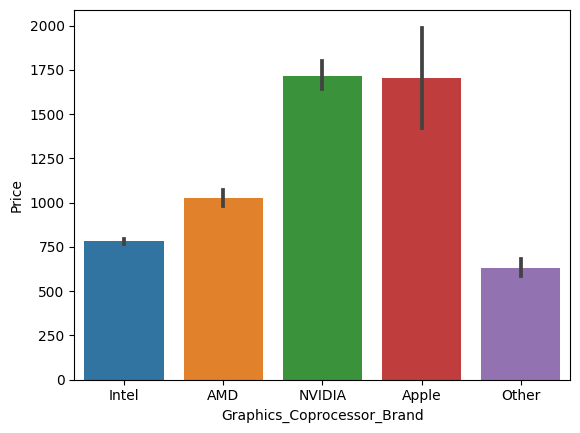

In [122]:
sns.barplot(x=df['Graphics_Coprocessor_Brand'],y=df['Price'])

plt.show()

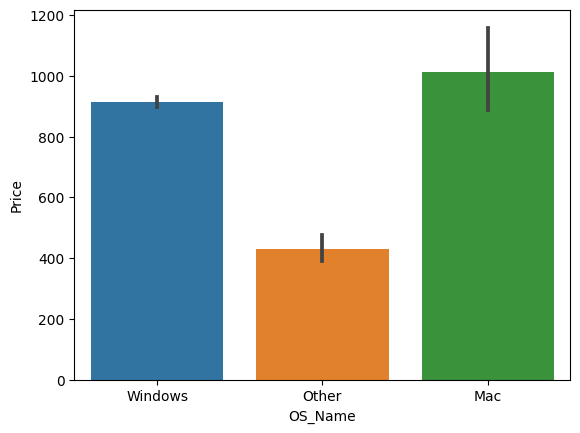

In [123]:
sns.barplot(x=df['OS_Name'],y=df['Price'])
plt.show()

In [124]:
# sns.barplot(x=df['MANU_Name'],y=df['Price'])
# plt.show()

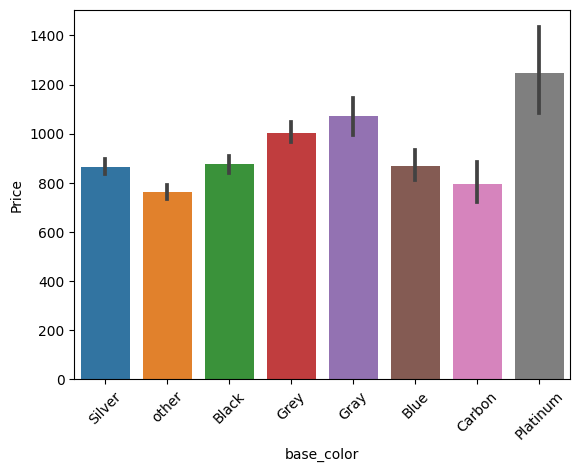

In [125]:
values = df['base_color'].value_counts()
filtered_ram = values[values > 80].index
filtered_df = df[df['base_color'].isin(filtered_ram)]

sns.barplot(x=filtered_df["base_color"], y=filtered_df['Price'])
plt.xticks(rotation=45)
plt.show()

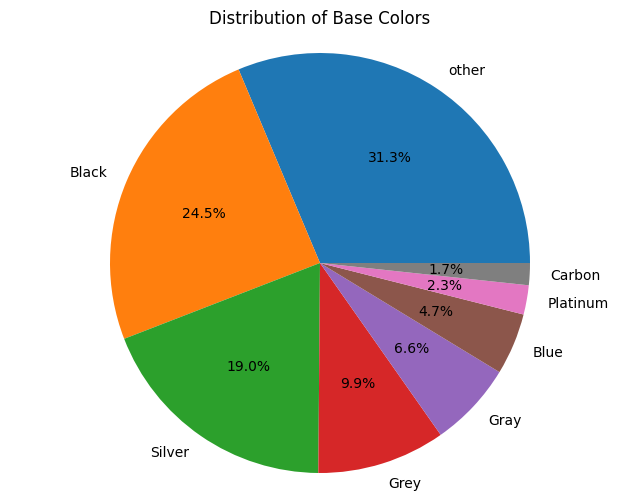

In [126]:
import matplotlib.pyplot as plt

# Get value counts for 'base_color' column
color_counts = df['base_color'].value_counts()

filtered_values = color_counts[color_counts > 80]


plt.figure(figsize=(8, 6))
plt.pie(filtered_values, labels=filtered_values.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Base Colors')
plt.show()

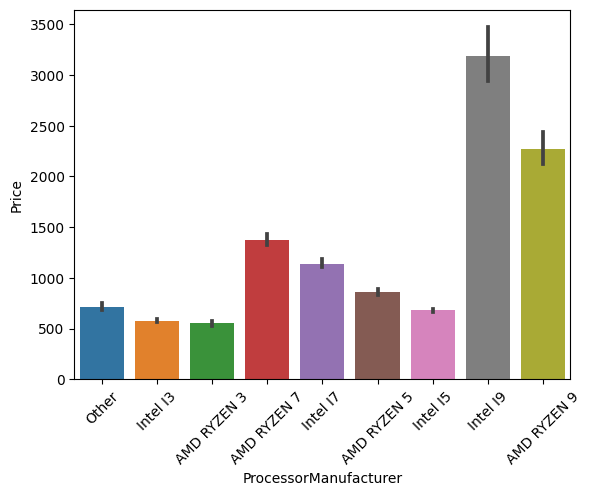

In [127]:
sns.barplot(x=df['ProcessorManufacturer'],y=df['Price'])
plt.xticks(rotation=45)
plt.show()

## Feature Engineering:

Pixels Per Inch:
Using Horizontal and Vertical Pixels we can calculate PPI.

PPI = √((Horizontal Pixels^2 + Vertical Pixels^2) / Diagonal Size^2)


In [128]:
df['PPI'] = (((df['HorizontalPixels']**2) + (df['VerticalPixels']**2))**0.5/df['DisplaySizeInches']).astype('float')

In [129]:
price_ppi_corr = df['Price'].corr(df['PPI'])

print("Correlation between Price and PPI:", price_ppi_corr)

Correlation between Price and PPI: 0.09941206548869247


<Axes: xlabel='RAM_in_GB'>

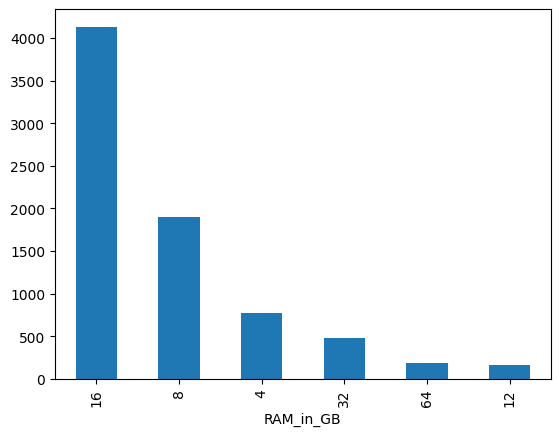

In [130]:
values = df['RAM_in_GB'].value_counts()

filtered_values = values[values > 100]
filtered_values.plot(kind='bar')

# df['RAM_in_GB'].value_counts().plot(kind='bar')

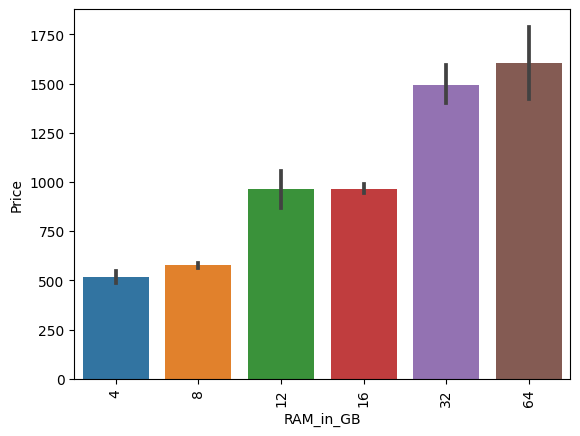

In [131]:
values = df['RAM_in_GB'].value_counts()
filtered_ram = values[values > 100].index
filtered_df = df[df['RAM_in_GB'].isin(filtered_ram)]

sns.barplot(x=filtered_df["RAM_in_GB"], y=filtered_df['Price'])
plt.xticks(rotation='vertical')
plt.show()

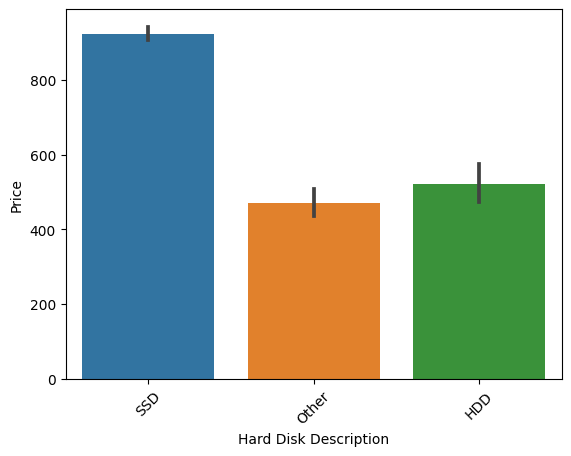

In [132]:
sns.barplot(x=df['Hard Disk Description'],y=df['Price'])
plt.xticks(rotation=45)
plt.show()

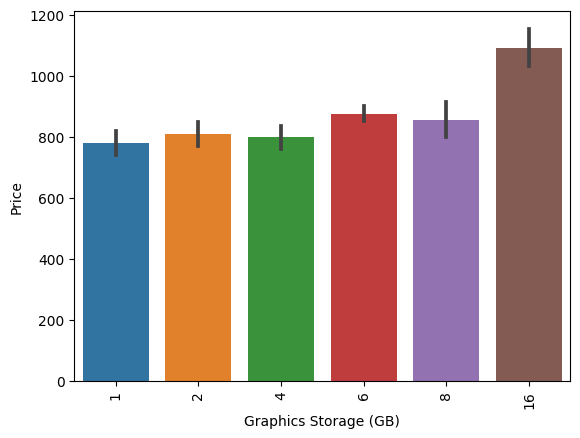

In [133]:
values = df['Graphics Storage (GB)'].value_counts()
filtered_ram = values[values > 200].index
filtered_df = df[df['Graphics Storage (GB)'].isin(filtered_ram)]

sns.barplot(x=filtered_df["Graphics Storage (GB)"], y=filtered_df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [134]:
# sns.barplot(x=df["Number of USB 3.0 Ports"],y=df['Price'])
# plt.xticks(rotation=45)
# plt.show()

/tmp/ipykernel_30446/965389106.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ProcessorSpeedGHz"])


<Axes: xlabel='ProcessorSpeedGHz', ylabel='Density'>

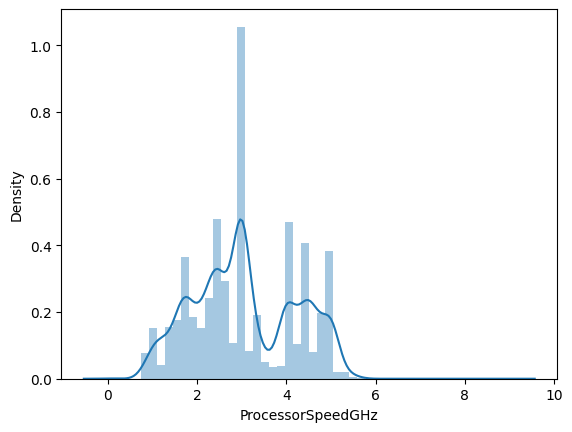

In [135]:
sns.distplot(df["ProcessorSpeedGHz"])

<Axes: xlabel='ProcessorSpeedGHz', ylabel='Price'>

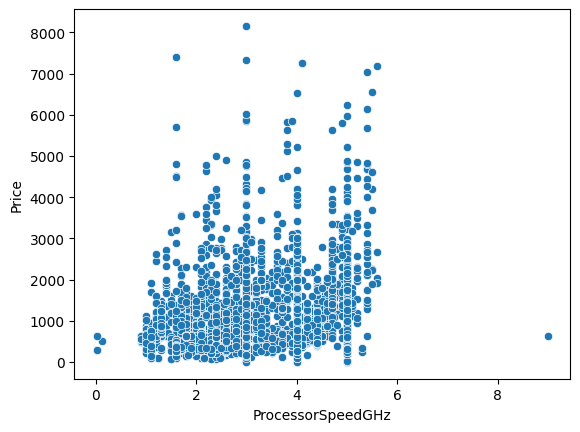

In [136]:
sns.scatterplot(x=df['ProcessorSpeedGHz'],y=df['Price'])

In [137]:


# Box-Cox Transformation
# boxcox(df['Price'])

# Yeo-Johnson Transformation
# yeojohnson(df['Price'])


In [138]:
# sns.distplot((df['Price_BoxCox']))

In [139]:
# sns.distplot((df['Price_YeoJohnson']))

In [140]:
X = df.drop(columns=['Price', 'Title'])
y = df['Price']

from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 19)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 19)

print("X Train Shape:", X_train.shape)
print("X Val Shape:", X_val.shape)
print("X Test Shape:", X_test.shape)

X Train Shape: (5617, 18)
X Val Shape: (1204, 18)
X Test Shape: (1204, 18)


In [141]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [142]:
# numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
# categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(drop='first'))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# # Append classifier to preprocessing pipeline
# regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                       ('regressor', LinearRegression())])

# # Fit the pipeline
# regression_pipeline.fit(X_train, y_train)

# # Predictions
# y_pred = regression_pipeline.predict(X_test)

# # Evaluation
# print('R2 score:', r2_score(y_test, y_pred))
# print('MAE:', mean_absolute_error(y_test, y_pred))

ValueError: Found unknown categories ['saintdise', 'power lion', 'lenovo - topseller velocity', 'g-jommi', 'crucial', 'tuhui', 'hammok', 'harry potter'] in column 0 during transform

In [ ]:
# numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
# categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# # Append classifier to preprocessing pipeline
# regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                       ('regressor', LinearRegression())])

# # Fit the pipeline
# regression_pipeline.fit(X_train, y_train)

# # Predictions
# y_val_pred = regression_pipeline.predict(X_test)

# # Evaluation
# print('R2 score:', r2_score(y_val, y_val_pred))
# print('MAE:', mean_absolute_error(y_val, y_val_pred))

R2 score: -0.5733968517780719
MAE: 617.4025732019762


/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [143]:
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor()
}

# Create pipelines for each model
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

# Fit and evaluate each pipeline
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"Model: {name}")
    print('R2 score:', r2_score(y_test, y_pred))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print("\n")

Model: Linear Regression
R2 score: 0.6279973284805311
MAE: 272.60475978561425


Model: Ridge Regression
R2 score: 0.6289590477715233
MAE: 273.6820869643104


Model: Lasso Regression
R2 score: 0.6104948470848194
MAE: 287.3693464401892


Model: Random Forest
R2 score: 0.8154729259215181
MAE: 157.23899797023554




In [145]:
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models with their respective hyperparameter grids
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Ridge Regression': (Ridge(), {'regressor__alpha': [0.1, 1.0, 10.0]}),
    'Lasso Regression': (Lasso(), {'regressor__alpha': [0.1, 1.0, 10.0]}),
    'Random Forest': (RandomForestRegressor(), {'regressor__n_estimators': [50, 100, 200]})
}

# Create pipelines for each model
pipelines = {}
for name, (model, params) in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipelines[name] = (pipeline, params)

# Fit and evaluate each pipeline
for name, (pipeline, params) in pipelines.items():
    grid_search = GridSearchCV(pipeline, params, scoring='neg_mean_absolute_error', cv=5)
    grid_search.fit(X_train, y_train)
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test)
    print(f"Model: {name}")
    print('Best Parameters:', grid_search.best_params_)
    print('Best Negative MAE:', grid_search.best_score_)
    print('R2 score:', r2_score(y_test, y_pred))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print("\n")

Model: Linear Regression
Best Parameters: {}
Best Negative MAE: -266.6035747879284
R2 score: 0.6279973284805311
MAE: 272.60475978561425


Model: Ridge Regression
Best Parameters: {'regressor__alpha': 0.1}
Best Negative MAE: -265.8858912824714
R2 score: 0.6294601054534561
MAE: 272.45615366045774


Model: Lasso Regression
Best Parameters: {'regressor__alpha': 0.1}
Best Negative MAE: -266.2169992507826
R2 score: 0.6266602764275291
MAE: 274.5575095821126


Model: Random Forest
Best Parameters: {'regressor__n_estimators': 200}
Best Negative MAE: -160.28549843733543
R2 score: 0.8160295293075917
MAE: 157.67304638884357




In [ ]:
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from sklearn.model_selection import train_test_split

# Transform the target variable y using Box-Cox
y_transformed, _ = boxcox(df['Price'])

# Splitting the data into features (X) and transformed target variable (y)
X = df.drop(columns=['Price', 'Title'])

# Ensure y is reshaped to a column vector
y_transformed = y_transformed.reshape(-1, 1)

# Splitting the transformed data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_transformed, test_size=0.3, random_state=19)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=19)

print("X Train Shape:", X_train.shape)
print("X Val Shape:", X_val.shape)
print("X Test Shape:", X_test.shape)


X Train Shape: (5611, 18)
X Val Shape: (1203, 18)
X Test Shape: (1203, 18)


In [151]:
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models with their respective hyperparameter grids
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Ridge Regression': (Ridge(), {'regressor__alpha': [0.1, 1.0, 10.0]}),
    'Lasso Regression': (Lasso(), {'regressor__alpha': [0.1, 1.0, 10.0]}),
    'Random Forest': (RandomForestRegressor(), {'regressor__n_estimators': [50, 100, 200]})
}

# Create pipelines for each model
pipelines = {}
for name, (model, params) in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipelines[name] = (pipeline, params)

# Fit and evaluate each pipeline
for name, (pipeline, params) in pipelines.items():
    grid_search = GridSearchCV(pipeline, params, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test)
    print(f"Model: {name}")
    print('Best Parameters:', grid_search.best_params_)
    print('Best Negative MAE:', grid_search.best_score_)
    print('R2 score:', r2_score(y_test, y_pred))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print("\n")

/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-pac

Model: Linear Regression
Best Parameters: {}
Best Negative MAE: -266.6035747879284
R2 score: 0.6279973284805311
MAE: 272.60475978561425




/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-pac

Model: Ridge Regression
Best Parameters: {'regressor__alpha': 0.1}
Best Negative MAE: -265.8858912824714
R2 score: 0.6294601054534561
MAE: 272.45615366045774




/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-pac

Model: Lasso Regression
Best Parameters: {'regressor__alpha': 0.1}
Best Negative MAE: -266.2169992507826
R2 score: 0.6266602764275291
MAE: 274.5575095821126




/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-pac

Model: Random Forest
Best Parameters: {'regressor__n_estimators': 200}
Best Negative MAE: -160.94338976058356
R2 score: 0.8113160837870692
MAE: 157.8542821018317




In [147]:
from scipy.stats import randint

# Define hyperparameter grid for Random Forest

# Create Random Forest pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions={
        'regressor__n_estimators': [int(x) for x in np.linspace(start=100, stop=200, num=10)],
        'regressor__max_features': ['auto', 'sqrt'],
        'regressor__max_depth': [20, 40, 60, 80, None],
        'regressor__min_samples_split': randint(2, 15),
        'regressor__min_samples_leaf': randint(1, 10),
        'regressor__bootstrap': [True, False]
    },
    n_iter=50,  # Reduced iterations
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Utilize all available CPU cores
)

random_search.fit(X_train, y_train)

# Best estimator
best_estimator = random_search.best_estimator_

# Predictions
y_val_pred = best_estimator.predict(X_val)

# Evaluation
print('Best Parameters:', random_search.best_params_)
print('Best Negative MAE:', random_search.best_score_)
print('R2 score:', r2_score(y_val, y_val_pred))
print('MAE:', mean_absolute_error(y_val, y_val_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarnin

Best Parameters: {'regressor__bootstrap': False, 'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 122}
Best Negative MAE: -151.36089374423693
R2 score: 0.8351836302243375
MAE: 135.09299317342214


In [152]:
import pickle

# Serialize the model
with open('best_random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_estimator, file)
    print(best_estimator)

print("Model saved successfully.")


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['DisplaySizeInches',
                                                   'HorizontalPixels',
                                                   'VerticalPixels', 'WeightKg',
                                                   'Refurbished', 'RAM_in_GB',
                                                   'Graphics Storage (GB)',
                                                   'ProcessorSpeedGHz',
                                                   'PPI']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
     

In [ ]:
# Make predictions on the test set
y_test_pred = best_estimator.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score

print('R2 score on test set:', r2_score(y_test, y_test_pred))
print('MAE on test set:', mean_absolute_error(y_test, y_test_pred))

R2 score on test set: 0.8475653797397265
MAE on test set: 1.2343901159149184


In [164]:
import pickle

# Load the trained pipeline from the saved pickle file
with open('../best_random_forest_model.pkl', 'rb') as file:
    pipeline = pickle.load(file)

# Extract the preprocessor from the pipeline
preprocessor = pipeline.named_steps['preprocessor']

# Extract transformers from ColumnTransformer
transformers = preprocessor.transformers_

# Initialize a list to store the names of features
feature_names = []

# Iterate over transformers to collect feature names
for name, transformer, features in transformers:
    if hasattr(transformer, 'get_feature_names_out'):
        # If the transformer has get_feature_names_out method, use it to get feature names
        names = transformer.get_feature_names_out(features)
    else:
        # If the transformer doesn't have get_feature_names_out method, use original feature names
        names = features
    feature_names.extend(names)

print("Order of features passed through preprocessor:")
print(feature_names)


Order of features passed through preprocessor:
['DisplaySizeInches', 'HorizontalPixels', 'VerticalPixels', 'WeightKg', 'Refurbished', 'RAM_in_GB', 'Graphics Storage (GB)', 'ProcessorSpeedGHz', 'PPI', 'Brand_a sus', 'Brand_aaravi prints', 'Brand_acemagic', 'Brand_acer', 'Brand_agb', 'Brand_alienware', 'Brand_alldocube', 'Brand_amazon renewed', 'Brand_amiamo', 'Brand_anciary', 'Brand_anmesc', 'Brand_apolomedia', 'Brand_apolosign', 'Brand_apple', 'Brand_asus', 'Brand_auusda', 'Brand_avintech', 'Brand_avita', 'Brand_awow', 'Brand_axl', 'Brand_bitecool', 'Brand_chuwi', 'Brand_cmpl', 'Brand_coconics', 'Brand_coolby', 'Brand_core innovations', 'Brand_dell', 'Brand_ecohero', 'Brand_evrain', 'Brand_excaliberpc', 'Brand_exilapsire', 'Brand_flausen', 'Brand_fujitsu', 'Brand_fusion5', 'Brand_futopia', 'Brand_g-anica', 'Brand_gadgets wrap', 'Brand_gateway', 'Brand_generic', 'Brand_gezoon', 'Brand_gigabyte', 'Brand_google', 'Brand_honor', 'Brand_hp', 'Brand_hp inc - smartbuy notebook', 'Brand_hp tun

In [166]:
import pickle

# Load the trained pipeline from the saved pickle file
with open('../best_random_forest_model.pkl', 'rb') as file:
    pipeline = pickle.load(file)

# Extract the preprocessor from the pipeline
preprocessor = pipeline.named_steps['preprocessor']

# Extract transformers from ColumnTransformer
transformers = preprocessor.transformers_

# Initialize a list to store the names of features
feature_names = []

# Iterate over transformers to collect feature names
for name, transformer, features in transformers:
    if hasattr(transformer, 'get_feature_names_out'):
        # If the transformer has get_feature_names_out method, use it to get feature names
        names = transformer.get_feature_names_out(features)
    else:
        # If the transformer doesn't have get_feature_names_out method, use original feature names
        names = features
    feature_names.extend(names)

print("Order of features passed through preprocessor:")
len(feature_names)


Order of features passed through preprocessor:


171

In [154]:
df.sample(5)

,Price,Title,Brand,Processor Brand,Memory Technology,Hard Disk Description,DisplaySizeInches,HorizontalPixels,VerticalPixels,WeightKg,Refurbished,base_color,RAM_in_GB,Graphics_Coprocessor_Brand,OS_Name,Graphics Storage (GB),Laptop_Type,ProcessorManufacturer,ProcessorSpeedGHz,PPI
6338,1679,"ASUS ROG Strix G15 (2022) Gaming Laptop, 15.6”...",asus,AMD,ddr5,SSD,15.6,1920.0,1080.0,0.002500,0,Gray,16,NVIDIA,Windows,6,Gaming,AMD RYZEN 7,3.2,141.211998
2587,944,HP 15s 12th Gen Intel Core i5 8GB RAM/512GB SS...,hp,Intel,ddr4,SSD,15.6,1920.0,1080.0,1.690000,0,Silver,8,Intel,Windows,8,Laptop,Intel I5,4.4,141.211998
484,1195,Late 2019 Apple MacBook Pro with 2.6GHz Intel ...,apple,Intel,other,Other,16.0,2560.0,1600.0,2.739696,1,Gray,32,Intel,Other,2,Other,Intel I7,2.6,188.679623
6691,2308,Lenovo 21HM000SUS ThinkPad X1 Carbon Gen 11 14...,lenovo group limited,Intel,other,SSD,14.0,1920.0,1200.0,1.120000,0,Black,32,Other,Windows,1,Laptop,Other,1.8,161.725391
7927,266,"Acer TravelMate P449 G3 Business Laptop, 14 In...",acer,Intel,other,SSD,14.0,1920.0,1080.0,2.200000,1,Black,8,Intel,Windows,6,Laptop,Intel I5,1.6,157.350512


In [168]:
df.to_csv("../data/csv/final.csv", index=False)

In [ ]:

from scipy.stats import yeojohnson
from sklearn.model_selection import train_test_split

# Transform the target variable y using Box-Cox


# Splitting the transformed data into training, validation, and testing sets


In [173]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import randint
from scipy.stats import boxcox
import joblib

# Load the dataset
df = pd.read_csv("../data/csv/final.csv")

y_transformed, _ = boxcox(df['Price'])

# Splitting the data into features (X) and transformed target variable (y)
X = df.drop(columns=['Price', 'Title'])

# Ensure y is reshaped to a column vector
y_transformed = y_transformed.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_transformed, test_size=0.3, random_state=19)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=19)

# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create Random Forest pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Define hyperparameter grid for Random Forest
param_distributions = {
    'regressor__n_estimators': [int(x) for x in np.linspace(start=100, stop=200, num=10)],
    'regressor__max_features': ['auto', 'sqrt'],
    'regressor__max_depth': [20, 40, 60, 80, None],
    'regressor__min_samples_split': randint(2, 15),
    'regressor__min_samples_leaf': randint(1, 10),
    'regressor__bootstrap': [True, False]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Best estimator
best_estimator = random_search.best_estimator_

# Save the best estimator
joblib.dump(best_estimator, 'best_random_forest_model.pkl')

print("Successful!")


/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/paras/conestoga_courses/ran_frameworks/CSCN8010-course/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

Successful!


In [174]:
print(_)

0.3007754147558123


In [175]:
y_val_pred = best_estimator.predict(X_val)

# Evaluation
print('Best Parameters:', random_search.best_params_)
print('Best Negative MAE:', random_search.best_score_)
print('R2 score:', r2_score(y_val, y_val_pred))
print('MAE:', mean_absolute_error(y_val, y_val_pred))

Best Parameters: {'regressor__bootstrap': False, 'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 122}
Best Negative MAE: -1.1467639800597347
R2 score: 0.8792940216539123
MAE: 1.0615624794885008
